In [1]:
#Importing libraries
# !pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']=300

In [2]:
#Load the data

In [3]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


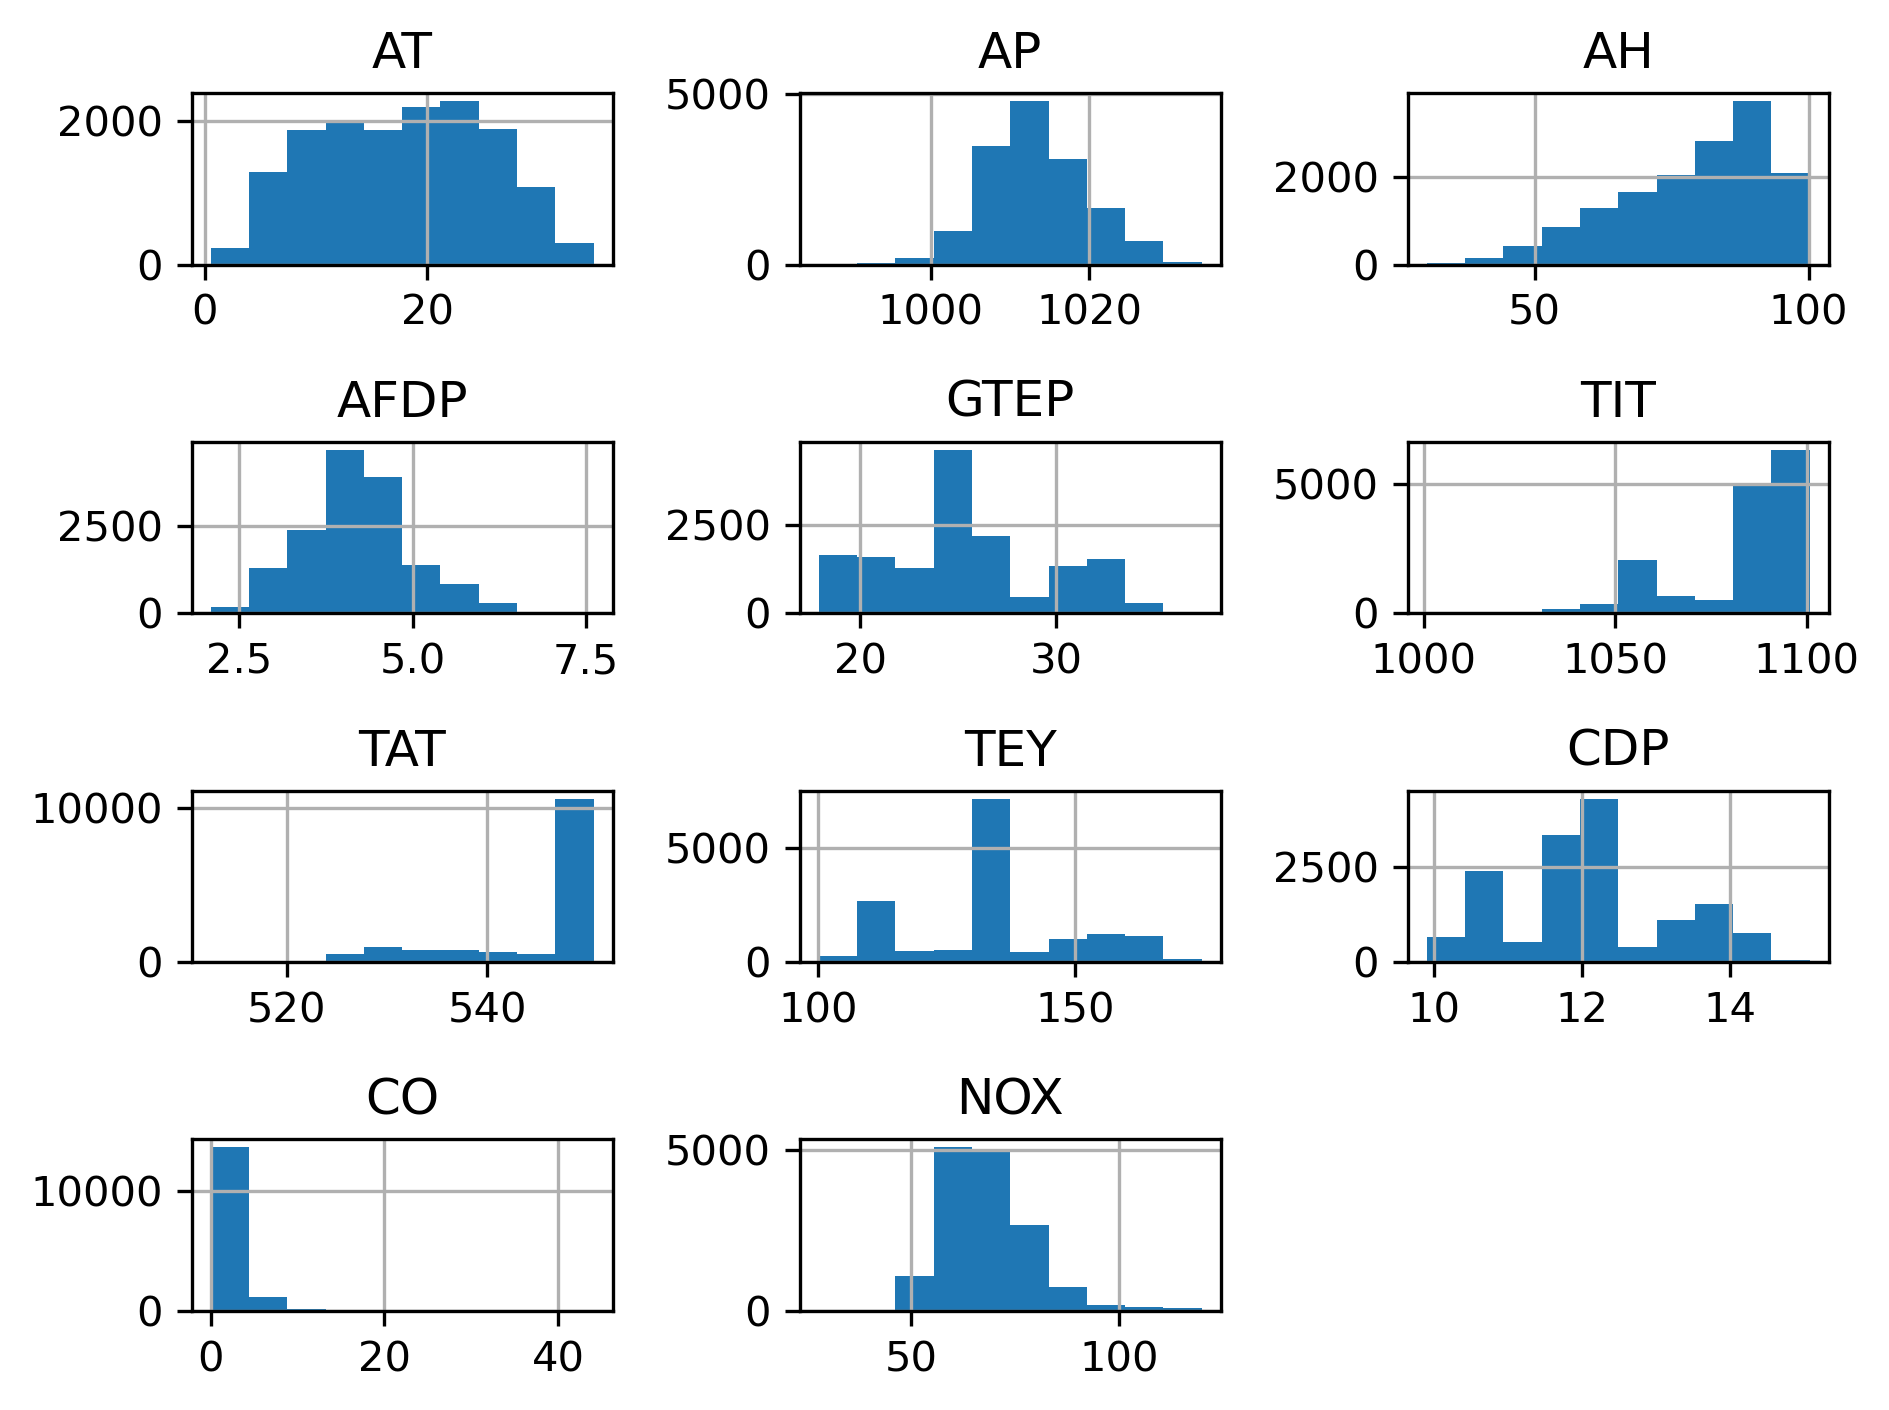

In [6]:
df.hist()
plt.tight_layout()

<Axes: >

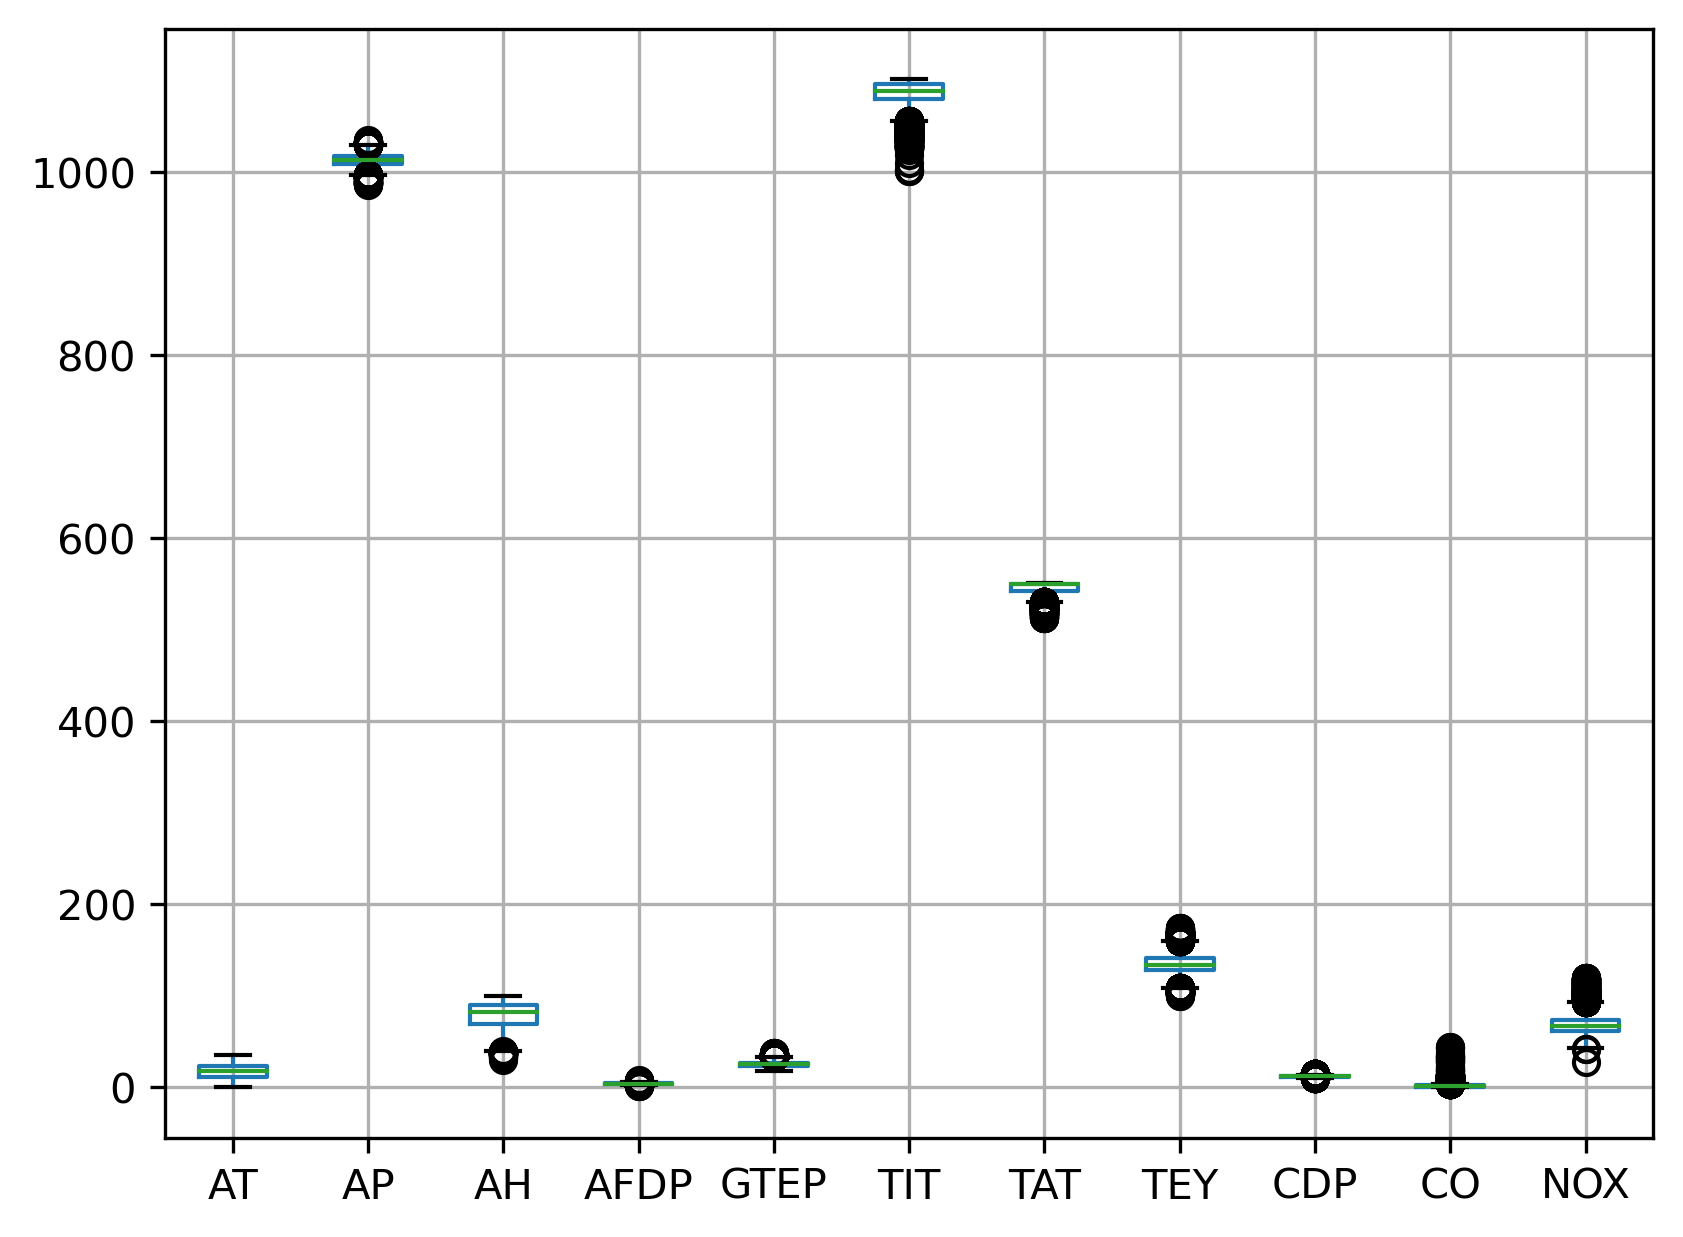

In [7]:
df.boxplot()#lots of outliers

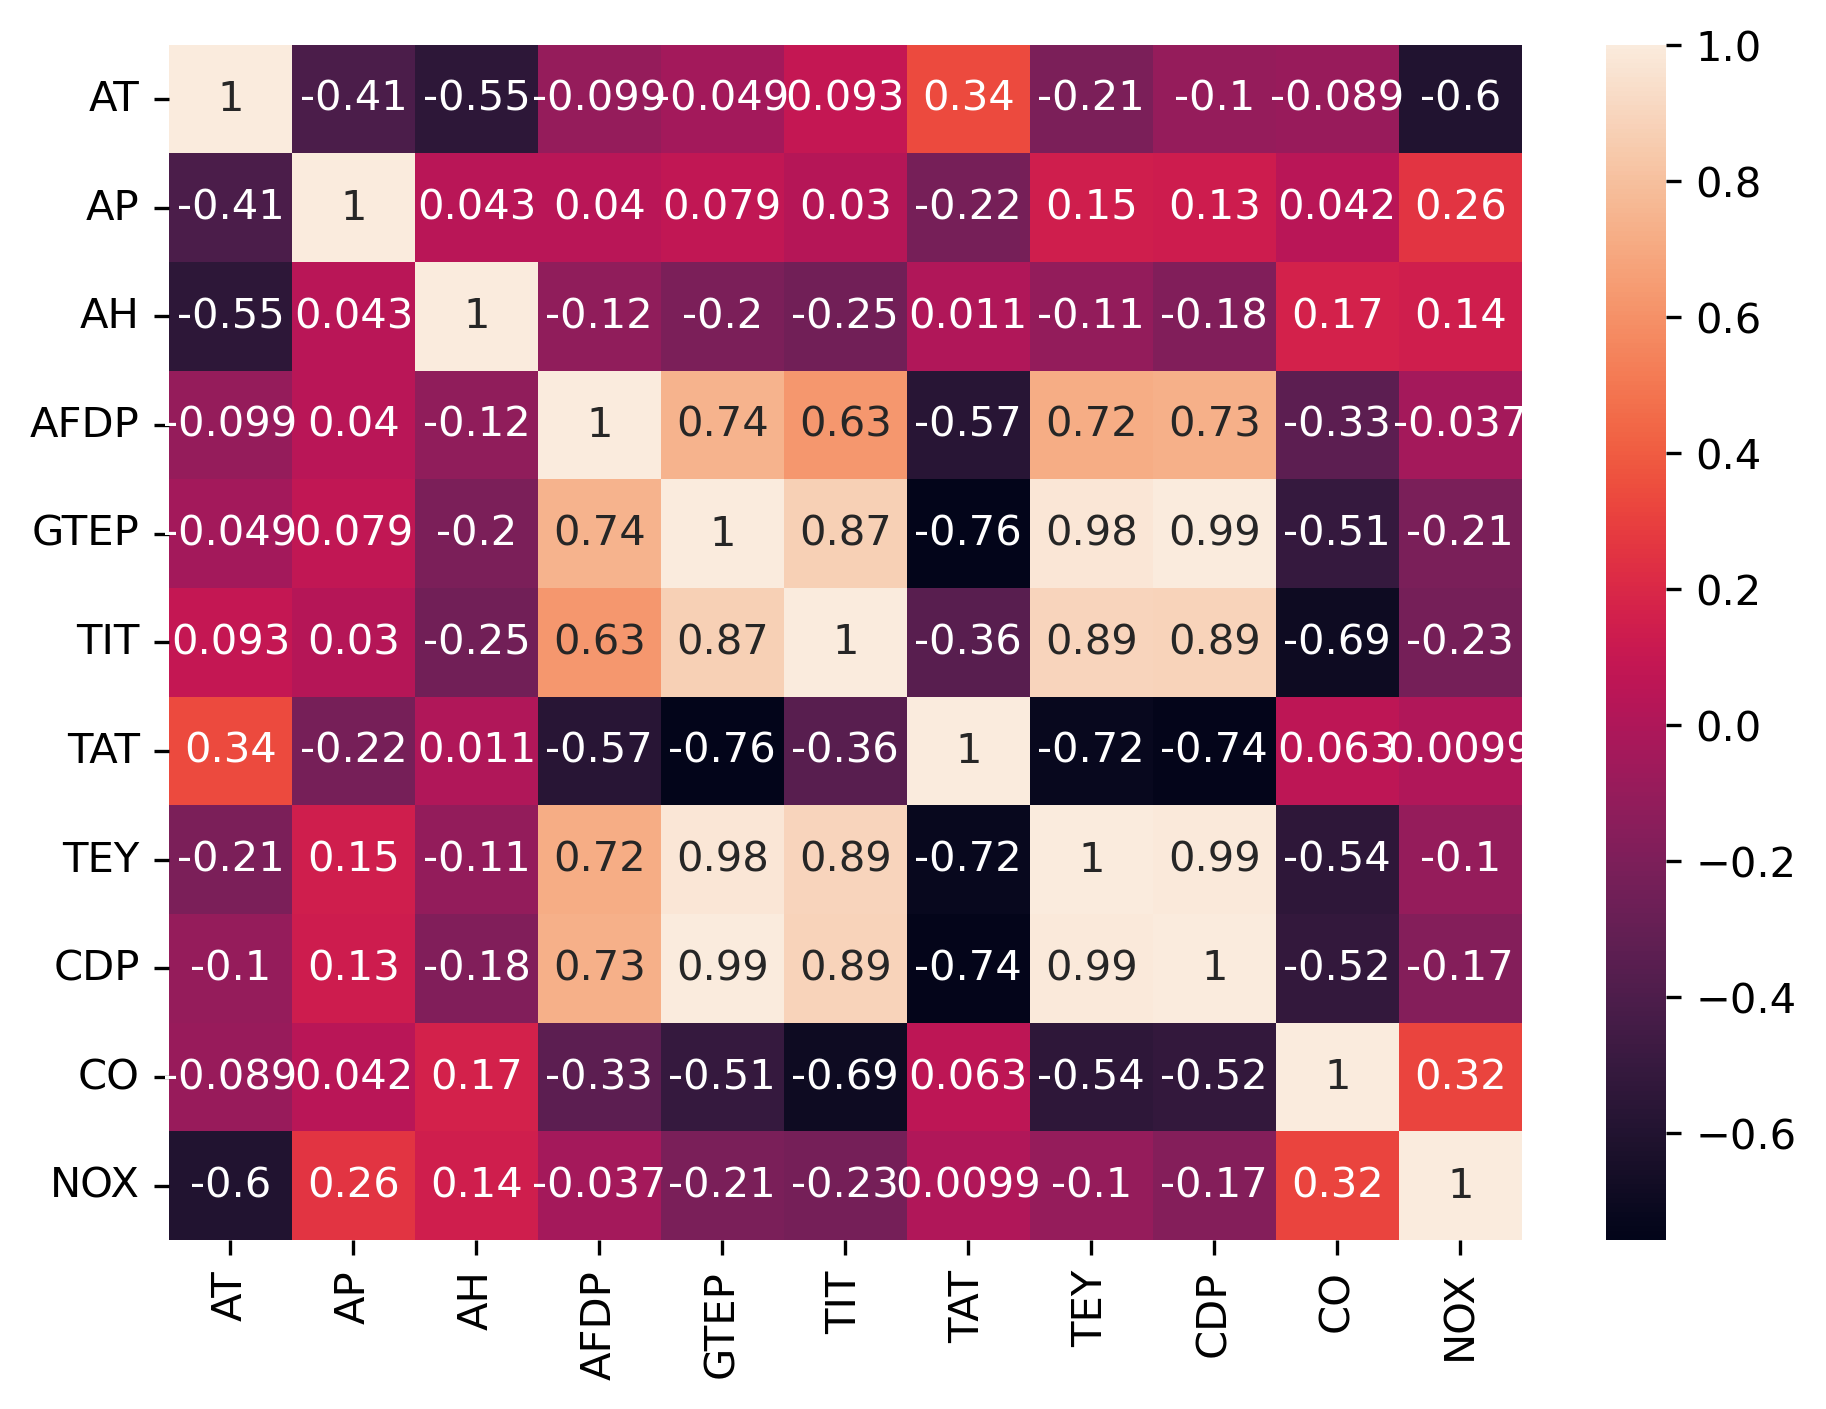

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.tight_layout()

In [9]:
# model building

In [10]:
sc = StandardScaler()
x = df.drop(columns=['TEY'])
y = df['TEY']

In [11]:
x = sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [14]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1))

ann.compile(optimizer='adam',loss = 'mse')

history=ann.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14307.9209 - val_loss: 931.4615
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 583.3625 - val_loss: 287.4207
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 242.1619 - val_loss: 176.0546
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 139.3905 - val_loss: 121.8125
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 101.1912 - val_loss: 91.4283
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 75.8772 - val_loss: 69.5491
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 57.9561 - val_loss: 52.6547
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 41.7768 - val_loss: 39.8779
Epoch 9/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 32.6592 - val_loss: 29.2291
Epoch 10/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 24.7492 - val_loss: 21.2790
Epoch 11/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 17.3198 - val_lo

Epoch 67/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5468 - val_loss: 0.5001
Epoch 68/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.5586 - val_loss: 0.5893
Epoch 69/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.5077 - val_loss: 0.6007
Epoch 70/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4984 - val_loss: 0.5297
Epoch 71/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.5075 - val_loss: 0.5272
Epoch 72/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.5230 - val_loss: 0.5090
Epoch 73/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.5491 - val_loss: 0.7423
Epoch 74/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.5140 - val_loss: 0.5290
Epoch 75/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.4979 - val_loss: 0.5048
Epoch 76/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.5039 - val_loss: 0.5531
Epoch 77/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.5329 - val_loss: 0.6050
Epoch 78/100
3

In [15]:
yp = ann.predict(xtest)
yp

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


array([[164.05779],
       [140.12083],
       [109.37962],
       ...,
       [157.35179],
       [135.03873],
       [164.88689]], dtype=float32)

In [16]:
history.history

{'loss': [9015.5830078125,
  434.2610168457031,
  207.1841278076172,
  130.6797332763672,
  93.39216613769531,
  70.5060806274414,
  53.75044631958008,
  40.85646057128906,
  30.67727279663086,
  22.70649528503418,
  16.3359432220459,
  11.93547248840332,
  8.618362426757812,
  6.205520153045654,
  4.572073936462402,
  3.4764676094055176,
  2.6331989765167236,
  2.0718507766723633,
  1.6609159708023071,
  1.3794175386428833,
  1.1648399829864502,
  1.0254782438278198,
  0.9093276262283325,
  0.8043147325515747,
  0.7356718182563782,
  0.6868348717689514,
  0.6340963840484619,
  0.6160434484481812,
  0.6032246947288513,
  0.5961889028549194,
  0.5746902227401733,
  0.5726273655891418,
  0.5621997117996216,
  0.590671956539154,
  0.5414720773696899,
  0.5559835433959961,
  0.5576356649398804,
  0.5517914295196533,
  0.5368551015853882,
  0.5365142226219177,
  0.5631458163261414,
  0.5349805951118469,
  0.5254901647567749,
  0.5327057242393494,
  0.5413720011711121,
  0.5081774592399597,


In [17]:
#'history.history' function stores the training loss and test loss in dictionary format.
loss = pd.DataFrame(history.history)
loss

,loss,val_loss
0,9015.583008,931.461548
1,434.261017,287.420746
2,207.184128,176.054642
3,130.679733,121.812531
4,93.392166,91.428307
...,...,...
95,0.504411,0.498985
96,0.501898,0.568791
97,0.517559,0.510507
98,0.538048,0.554605


<Axes: >

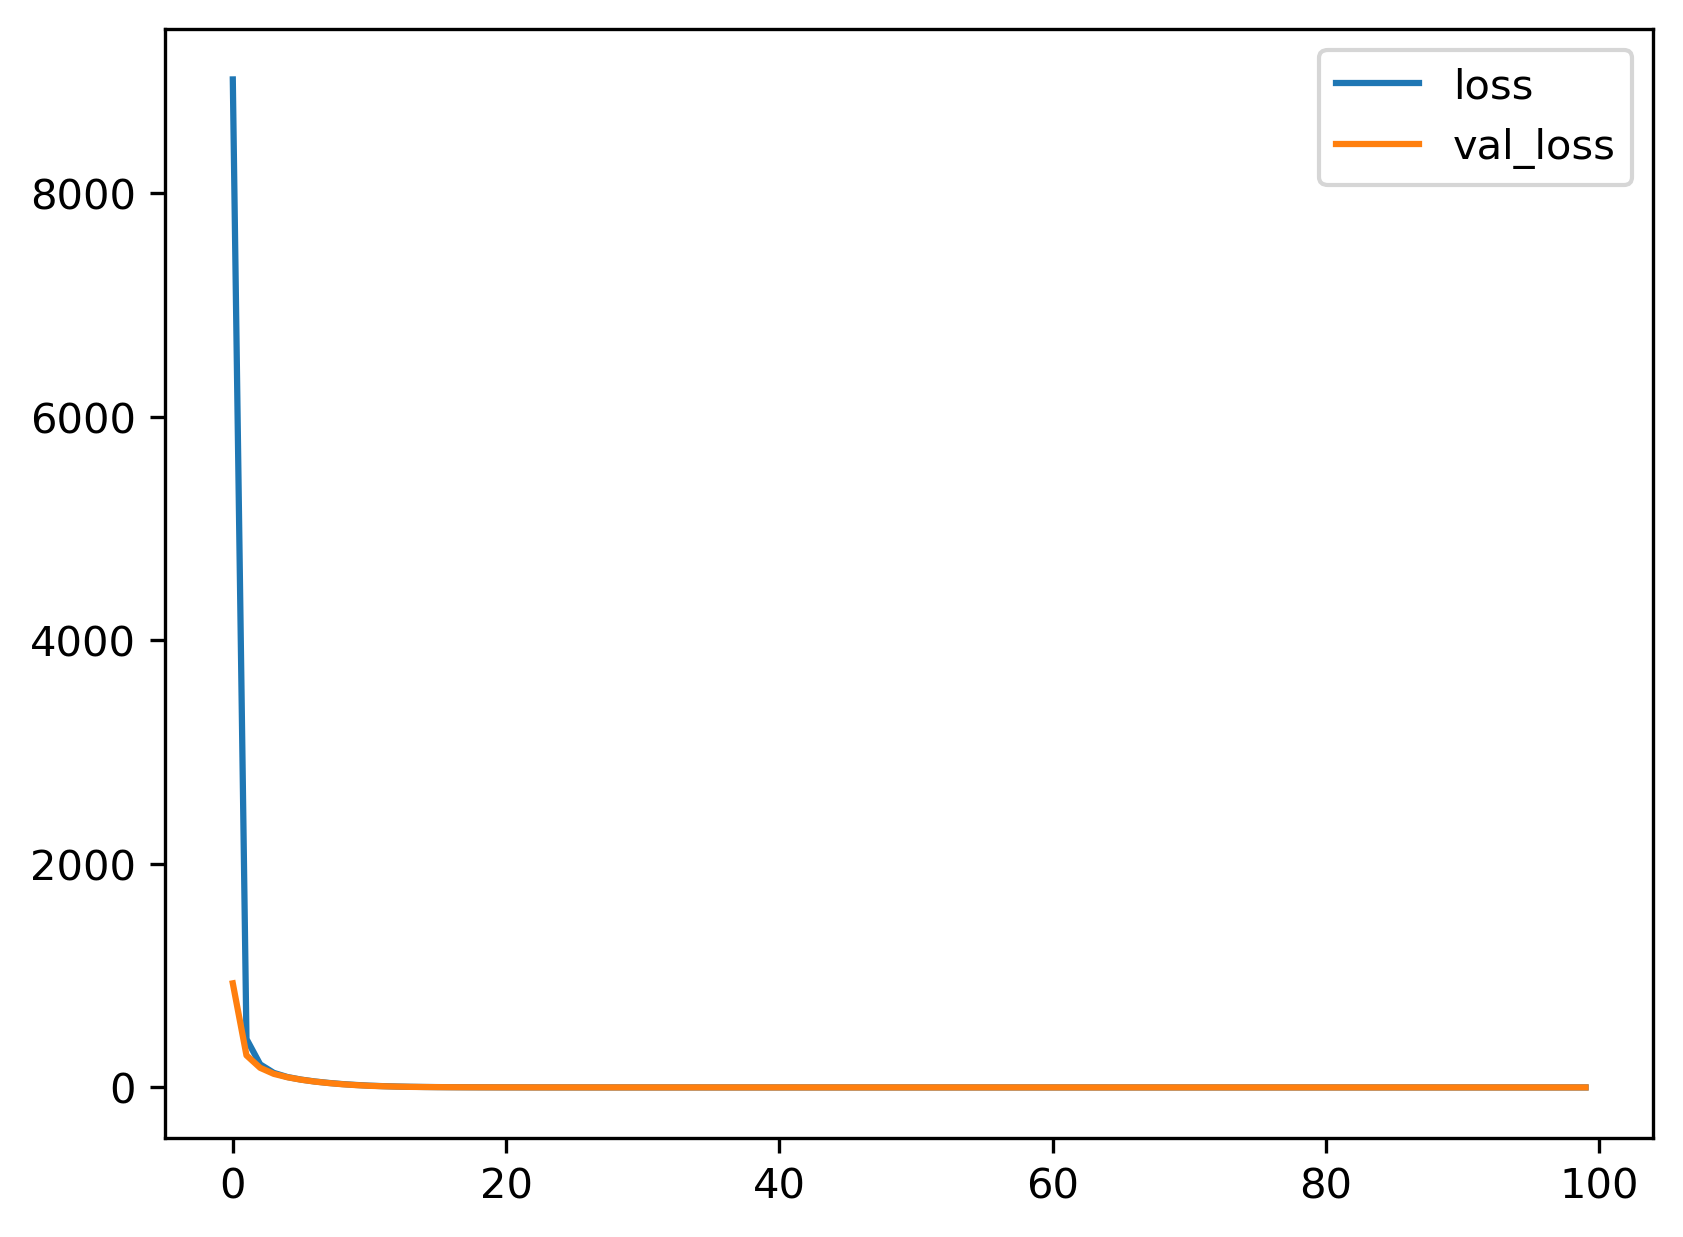

In [18]:
loss.plot()

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(ytest,yp)#we seem to have good r2 score

0.9980410974505911

In [21]:
# Hyperparameter tuning

In [22]:
#!pip install -U keras-tuner

In [23]:
import keras_tuner as kf
from keras_tuner import RandomSearch

In [24]:
df.shape

(15039, 11)

In [25]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=3, max_value=12)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i), min_value=10, max_value=200, step=10),
                            activation=hp.Choice('activation'+str(i), values=['relu', 'tanh']),
                            input_dim=10))
        else:
            model.add(Dense(hp.Int('units'+str(i), min_value=10, max_value=200, step=10),
                            activation=hp.Choice('activation'+str(i), values=['relu', 'tanh'])))
        counter += 1
    # Output layer for regression
    model.add(Dense(units=1, activation='linear'))
    # Compile model for regression
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  loss='mse',  # Mean squared error for regression
                  metrics=['mse'])  # Can also monitor MAE or other regression metrics
    return model

In [26]:
tuner = kf.RandomSearch(
    hyper,
    objective='val_mse',
    max_trials=3,
    directory='new_project1',  # Ensure this is a directory that doesn't have old tuner files
    project_name='tuner1'
)

In [27]:
tuner.search(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

Trial 3 Complete [00h 00m 05s]
val_mse: 252.4916534423828

Best val_mse So Far: 252.48776245117188
Total elapsed time: 00h 00m 16s


In [28]:
# Get the best hyperparameters 
best_hps = tuner.get_best_hyperparameters()[0].values
best_hps

{'num_layers': 6,
 'units0': 50,
 'activation0': 'relu',
 'units1': 190,
 'activation1': 'tanh',
 'units2': 160,
 'activation2': 'relu',
 'optimizer': 'sgd',
 'units3': 10,
 'activation3': 'relu',
 'units4': 10,
 'activation4': 'relu',
 'units5': 10,
 'activation5': 'relu'}

In [29]:
#and the best model
tuned_model = tuner.get_best_models(num_models=1)[0]

In [30]:
# Summarize the model
tuned_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 190)                 │           9,690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 160)                 │          30,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,610 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,641 (166.57 KB)

 Trainable params: 42,641 (166.57 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Fit the tuned model
tuned_model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest))

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 247.5809 - mse: 247.5809 - val_loss: 252.4890 - val_mse: 252.4890
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250.0562 - mse: 250.0562 - val_loss: 252.4907 - val_mse: 252.4907
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 252.8252 - mse: 252.8252 - val_loss: 253.2315 - val_mse: 253.2315
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 252.2604 - mse: 252.2603 - val_loss: 252.5017 - val_mse: 252.5017
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 254.6239 - mse: 254.6239 - val_loss: 252.4868 - val_mse: 252.4868
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 252.5874 - mse: 252.5874 - val_loss: 252.4956 - val_mse: 252.4956
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 249.9540 - mse: 249.9541 - val_loss: 252.9003 - val_mse: 252.9003
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 253.3766 - mse: 253.3766 - val_loss: 252.5395

In [32]:
# Evaluate the tuned model on the training data
train_eval = tuned_model.evaluate(xtrain, ytrain)

376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 251.5902 - mse: 251.5902


In [33]:
# Evaluate the tuned model on the test data
test_eval = tuned_model.evaluate(xtest, ytest)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 261.0016 - mse: 261.0016
